In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('wine_data2.csv')


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

/var/folders/ym/2sqkc80j6v12983djwz1730m0000gn/T/ipykernel_64053/3773127040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


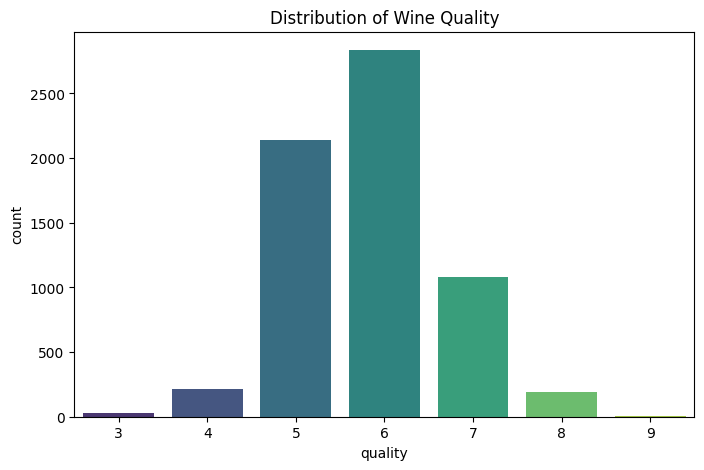

In [4]:
#quality distribution 
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.show()
#most wines are "average" (rated 5 or 6).

### Observations:
* **Central Tendency:** Most wines are concentrated in the **5, 6, and 7** range.
* **Imbalance:** There is a significant lack of data for extremely low (3) or extremely high (9) quality wines.
* **Data Strategy:** Because the classes are imbalanced, we may consider grouping quality into bins:
    * **Low Quality:** 3–4
    * **Medium Quality:** 5–6
    * **High Quality:** 7–9

### 2.1 Handling Non-Numeric Data for Correlation

The dataset contains a `type` column (categorical data: Red vs. White). Since correlation requires numerical values, we must filter out text-based columns.


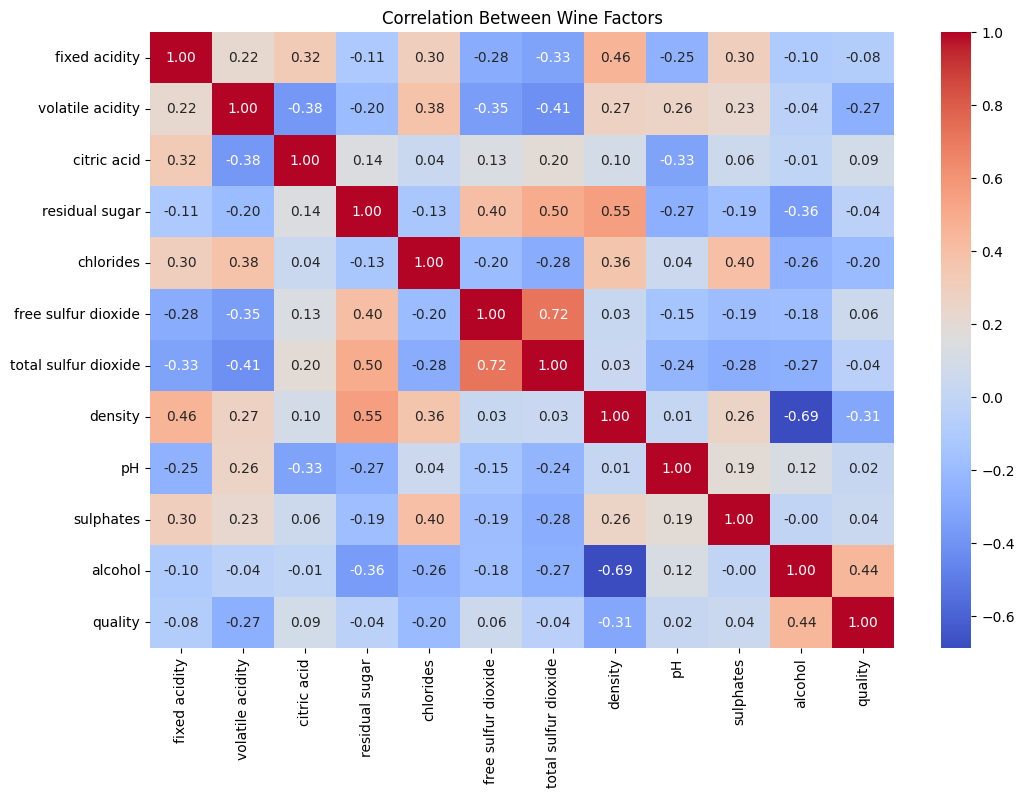

In [16]:
#correlation map
# Updated correlation code
plt.figure(figsize=(12, 8))

# numeric_only=True ignores the 'type' column and other text data
correlation = df.corr(numeric_only=True) 

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Wine Factors')
plt.show()

## 3. Deep Dive: Alcohol Content vs. Quality

Based on the heatmap, **alcohol** appears to be one of the most influential factors. However, a correlation coefficient only tells part of the story. We use a **Boxplot** to see the distribution of alcohol levels within each quality category.

/var/folders/ym/2sqkc80j6v12983djwz1730m0000gn/T/ipykernel_64053/1088080644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='GnBu')


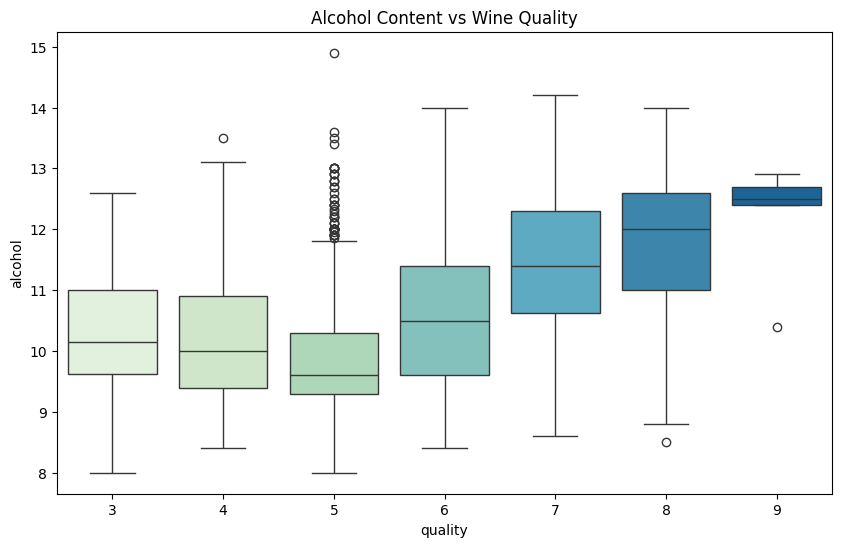

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='GnBu')
plt.title('Alcohol Content vs Wine Quality')
plt.show()

## 3. Statistical Analysis: Alcohol Content and Quality

Having identified a positive correlation between alcohol and quality, we now investigate the consistency of this relationship.

### Analysis of Research Questions:
1.  **Consistency of Median:** By looking at the horizontal line within each box, we can see if the "typical" alcohol level rises as quality improves.
2.  **Outlier Detection:** The points beyond the "whiskers" represent wines that defy the trend—such as high-alcohol wines that were rated poorly, or low-alcohol wines that received high scores.

### Visualization: Alcohol vs. Quality Boxplot

/var/folders/ym/2sqkc80j6v12983djwz1730m0000gn/T/ipykernel_64053/788262676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='flare')


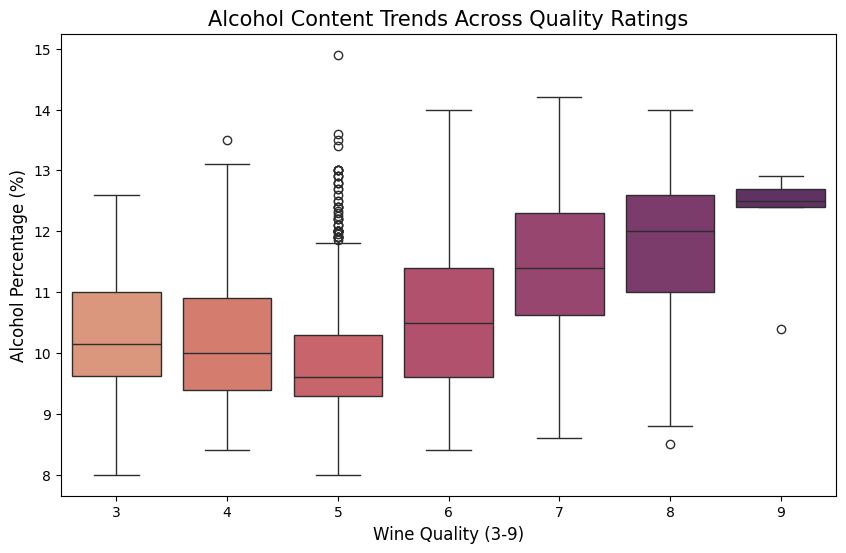

In [10]:
plt.figure(figsize=(10, 6))


sns.boxplot(x='quality', y='alcohol', data=df, palette='flare')



plt.title('Alcohol Content Trends Across Quality Ratings', fontsize=15)
plt.xlabel('Wine Quality (3-9)', fontsize=12)
plt.ylabel('Alcohol Percentage (%)', fontsize=12)
plt.show()

## 4. Aggregate Analysis: Average Chemical Profiles by Quality

To see the "big picture," we group the dataset by `quality` and calculate the **mean** (average) for every chemical factor. This table allows us to observe how chemical properties shift as we move from poor-quality wines to premium-quality wines.

### Research Questions:
* Does **volatile acidity** consistently decrease as quality improves?
* Is there a specific threshold of **residual sugar** that high-quality wines share?
* How does the **sulphate** level change for top-tier wines (8-9) compared to mid-tier (5-6)?

### Summary Table: Mean Values per Quality Grade

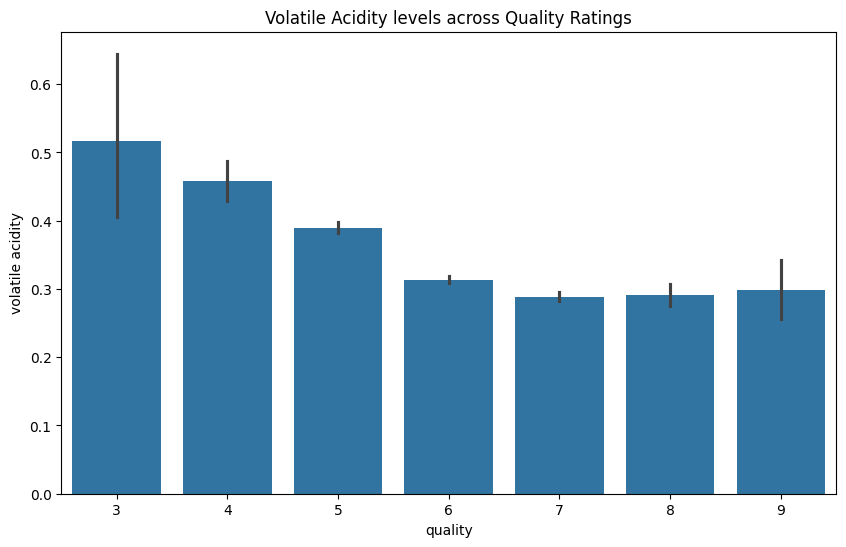

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity levels across Quality Ratings')
plt.show()

# Final Conclusion: What Makes a High-Quality Wine?

After performing an Exploratory Data Analysis (EDA) on the wine dataset, we can draw several definitive conclusions about the chemical characteristics that influence wine quality.

### 1. The "Golden Rules" of Quality
Based on our correlations and mean analysis, a high-quality wine (Rating 7-9) typically follows this profile:
* **High Alcohol Content:** There is a strong positive relationship between alcohol percentage and quality. Higher alcohol often indicates better grape ripeness and fermentation.
* **Low Volatile Acidity:** Quality is inversely related to volatile acidity. High levels of acetic acid (vinegar smell) are the most consistent indicator of a low-quality rating.
* **Optimal Sulphate Levels:** Better wines tend to have slightly higher sulphate levels, which help preserve the wine and prevent oxidation.

### 2. The Balancing Act (pH vs. Acidity)
While `fixed acidity` and `pH` are chemically linked, they do not have a linear relationship with quality. Instead, they represent a **threshold**: a wine must be "acidic enough" to be balanced, but extremes in either direction generally result in average scores.

### 3. Key Findings for Machine Learning
If we were to build a predictive model, the most important features (Predictors) would likely be:
1. `alcohol`
2. `volatile acidity`
3. `sulphates`
4. `citric acid`

